In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

import confmain
from util_module import util_func
from util_module import model_func
from util_module.ecg_signal import ECGSignal

In [2]:
def plot_rhytm(X, y, zpad, start_idx, ax=None, save_path=None):
    all_signal = []
    all_segment_map = []

    # 1 rhytm = 5 beats
    for i in range(5):
        signal = X[start_idx+i].flatten()
        segment_map = y[start_idx+i].argmax(axis=1)

        beat_span = len(signal) - zpad[start_idx+i]

        all_signal.extend(signal[:beat_span])
        all_segment_map.extend(segment_map[:beat_span])

    ax = ECGSignal.plot_signal_segments(all_signal, all_segment_map, ax, save_path)

    return ax

In [3]:
LEAD = 'i_ii_iii'

# data = util_func.open_pickle(f'../data/ludb_processed/ludb_{LEAD}.pickle')
data = util_func.open_pickle(f'../data/test_ludb/test_{LEAD}.pickle')
df = pd.DataFrame(data=data)

features = df.iloc[:, :-1]
y = df.iloc[:, -1].values

features_train, features_val, features_test, y_train, y_val, y_test = model_func.train_val_test_split(features, y)
X_train = np.array(features_train['signal'].tolist())
X_val = np.array(features_val['signal'].tolist())
X_test = np.array(features_test['signal'].tolist())
zpad_length_train = features_train['zpad_length'].values
zpad_length_val = features_val['zpad_length'].values
zpad_length_test = features_test['zpad_length'].values

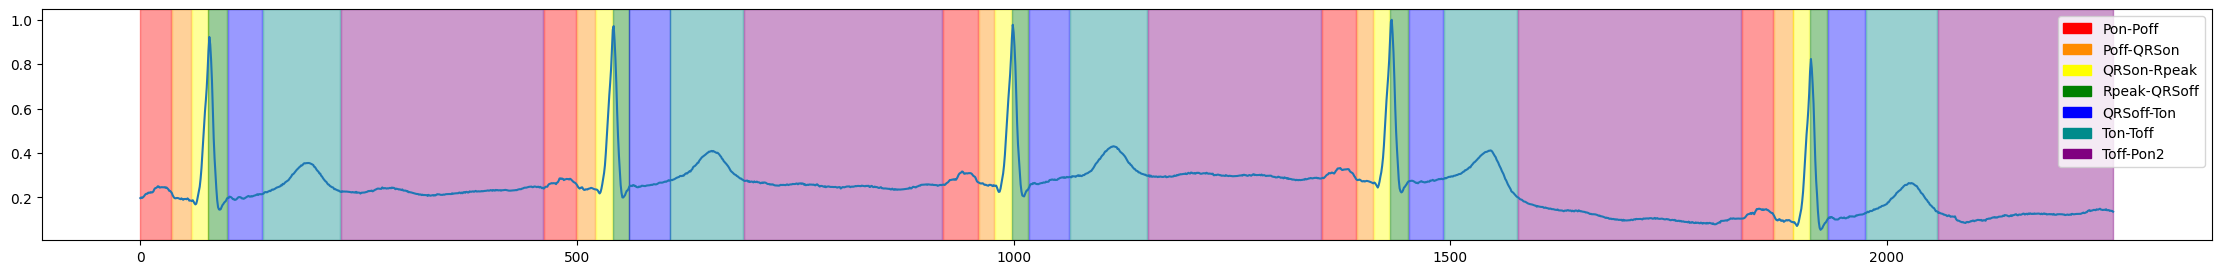

In [4]:
plot_rhytm(X_val, y_val, zpad=zpad_length_val, start_idx=13)

In [5]:
model = tf.keras.models.load_model(f'../model/{LEAD}.h5')

y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

12/12 [==============================] - 279s 23s/step


In [6]:
def plot_rhytm_gt_pred(X, y, y_pred, zpad, start_idx, fig_title, save_path=None):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(28, 6))

    plot_rhytm(X, y, zpad=zpad, start_idx=start_idx, ax=ax1)
    plot_rhytm(X, y_pred, zpad=zpad, start_idx=start_idx, ax=ax2)

    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_xlabel('')
    ax1.set_ylabel('Ground Truth', fontsize=16)

    ax2.get_legend().remove()
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_xlabel('')
    ax2.set_ylabel('Prediction', fontsize=16)

    fig.suptitle(fig_title, fontsize=18, fontweight='bold')
    fig.subplots_adjust(hspace=0, top=0.9)
    if save_path is not None:
        fig.savefig(save_path)

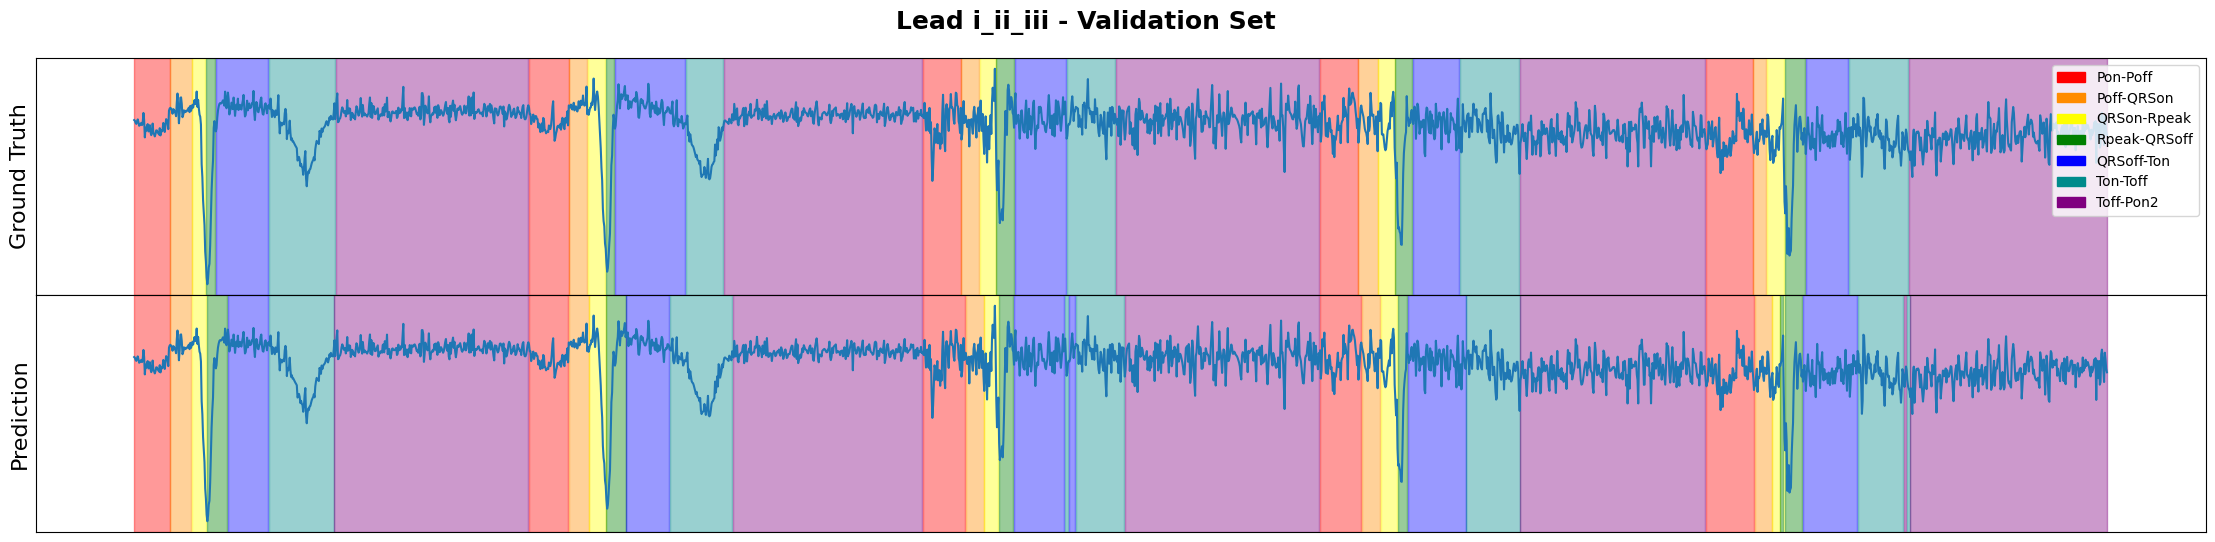

In [7]:
plot_rhytm_gt_pred(X_val, y_val, y_pred_val,
                   zpad=zpad_length_val,
                   start_idx=41,
                   fig_title=f'Lead {LEAD} - Validation Set',
                   save_path=f'../result/{LEAD}_val.jpg')

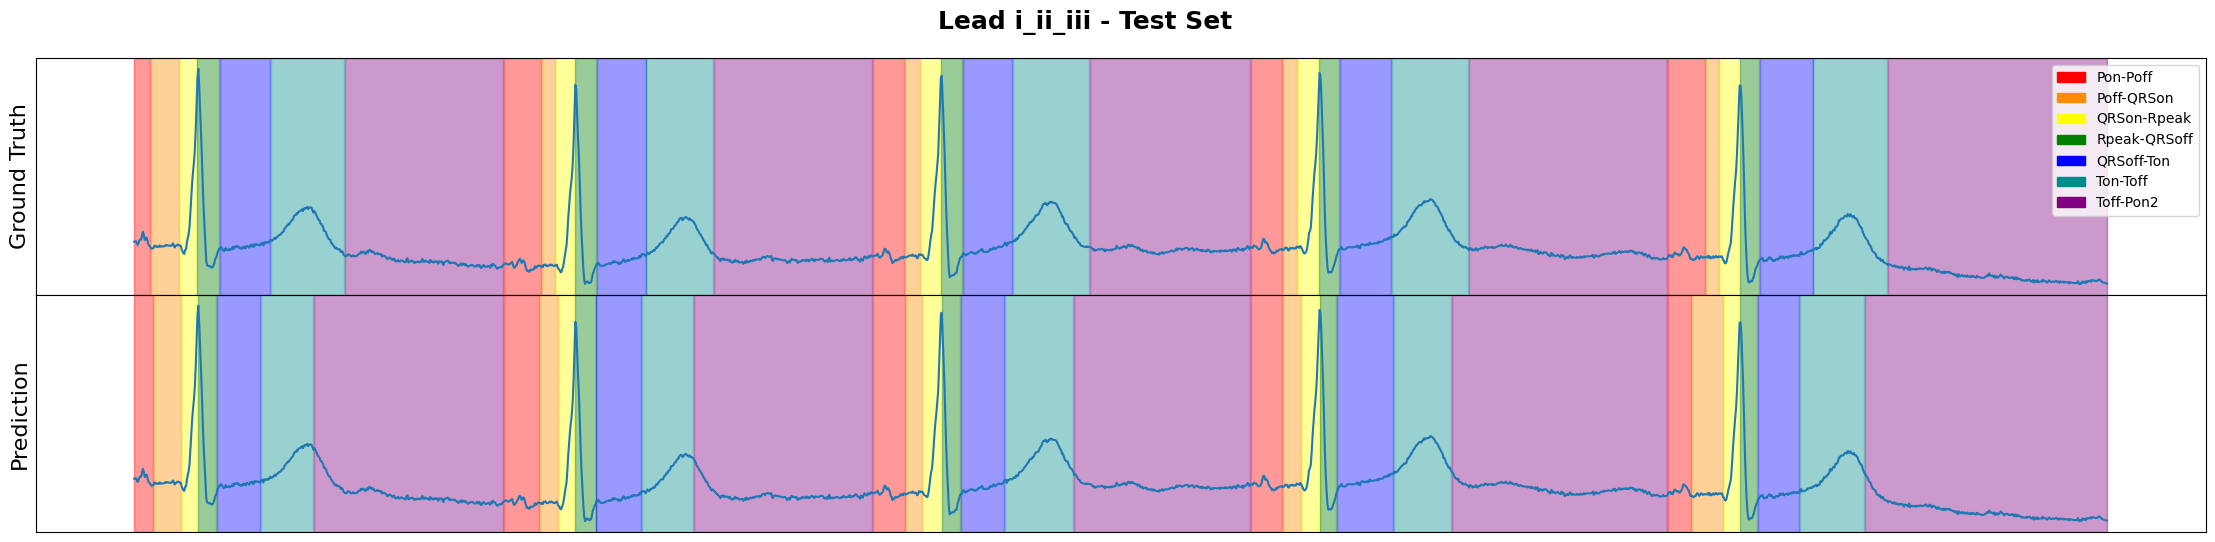

In [8]:
plot_rhytm_gt_pred(X_test, y_test, y_pred_test,
                   zpad=zpad_length_test,
                   start_idx=74,
                   fig_title=f'Lead {LEAD} - Test Set',
                   save_path=f'../result/{LEAD}_test.jpg')